In [3]:
import numpy as np
import pandas as pd 
import os

In [10]:
os.listdir('C:/Users/ozaka/Documents/VS_ML/ML/Rice_Image_Dataset')

['Rice_Image_Dataset']

In [11]:
import matplotlib.pyplot as plt
from matplotlib import image

In [13]:
im = image.imread('C:/Users/ozaka/Documents/VS_ML/ML/Rice_Image_Dataset/Rice_Image_Dataset/Arborio/Arborio (1).jpg')
im.shape

(250, 250, 3)

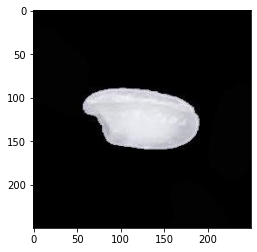

In [14]:
plt.imshow(im)

In [16]:
im = image.imread('C:/Users/ozaka/Documents/VS_ML/ML/Rice_Image_Dataset/Rice_Image_Dataset/Basmati/Basmati (1).jpg')
im.shape

(250, 250, 3)

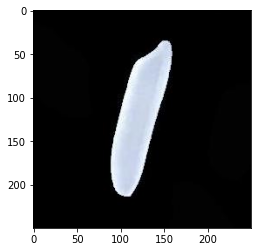

In [17]:
plt.imshow(im)

In [18]:
im = image.imread('C:/Users/ozaka/Documents/VS_ML/ML/Rice_Image_Dataset/Rice_Image_Dataset/Ipsala/Ipsala (1).jpg')
im.shape

(250, 250, 3)

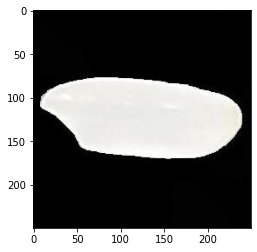

In [19]:
plt.imshow(im)

In [20]:
im = image.imread('C:/Users/ozaka/Documents/VS_ML/ML/Rice_Image_Dataset/Rice_Image_Dataset/Jasmine/Jasmine (1).jpg')
im.shape

(250, 250, 3)

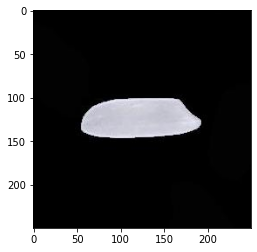

In [21]:
plt.imshow(im)

In [22]:
im = image.imread('C:/Users/ozaka/Documents/VS_ML/ML/Rice_Image_Dataset/Rice_Image_Dataset/Karacadag/Karacadag (1).jpg')
im.shape

(250, 250, 3)

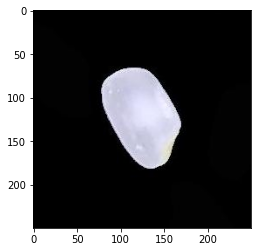

In [23]:
plt.imshow(im)

In [24]:
from PIL import Image

In [25]:
import numpy as np
def Load_Images(impath):
    imgs = []
    label = []
    l1 = os.listdir(impath)
    for i in l1:
        l2 = os.listdir(impath + '/' + i)
        for j in l2[:1000]:
            c = 0
            img = Image.open(impath + i + '/' + j)
            img = img.resize(size = (28,28))
            img = img.convert('L')
            imgs.append(np.array(img).flatten())
            label.append(i)
            del img
    return np.array(imgs),label

In [26]:
x, y = Load_Images('C:/Users/ozaka/Documents/VS_ML/ML/Rice_Image_Dataset/Rice_Image_Dataset/')

In [27]:
x.shape, len(y)

((5000, 784), 5000)

In [28]:
a = pd.Series(y, dtype = 'category')
a

0         Arborio
1         Arborio
2         Arborio
3         Arborio
4         Arborio
          ...    
4995    Karacadag
4996    Karacadag
4997    Karacadag
4998    Karacadag
4999    Karacadag
Length: 5000, dtype: category
Categories (5, object): ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [29]:
a.value_counts()

Arborio      1000
Basmati      1000
Ipsala       1000
Jasmine      1000
Karacadag    1000
dtype: int64

In [30]:
b = a.cat.codes
b

0       0
1       0
2       0
3       0
4       0
       ..
4995    4
4996    4
4997    4
4998    4
4999    4
Length: 5000, dtype: int8

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x ,b, test_size = 0.2, shuffle = True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4000, 784), (1000, 784), (4000,), (1000,))

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dense(120, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 120)               7800      
                                                                 
 dense_2 (Dense)             (None, 100)               12100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 5)                 255       
                                                                 
Total params: 75,445
Trainable params: 75,445
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 50, validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 2.8219 - accuracy: 0.7734 - val_loss: 0.2627 - val_accuracy: 0.9325
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.9509 - val_loss: 0.2759 - val_accuracy: 0.9388
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.9578 - val_loss: 0.1938 - val_accuracy: 0.9525
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1308 - accuracy: 0.9616 - val_loss: 0.2638 - val_accuracy: 0.9262
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.1511 - accuracy: 0.9575 - val_loss: 0.1470 - val_accuracy: 0.9588
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1309 - accuracy: 0.9678 - val_loss: 0.3191 - val_accuracy: 0.9312
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.9663 - val_loss: 0.1363 - val_accuracy: 0.9538
Epoch 

In [34]:
model.evaluate(x_train, y_train)

125/125 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9865


[0.052044447511434555, 0.9865000247955322]

In [35]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0927 - accuracy: 0.9770


[0.0927310511469841, 0.9769999980926514]

In [36]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 50, validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 0.0354 - accuracy: 0.9903 - val_loss: 0.1096 - val_accuracy: 0.9688
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0352 - accuracy: 0.9894 - val_loss: 0.1184 - val_accuracy: 0.9675
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9837 - val_loss: 0.1176 - val_accuracy: 0.9712
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9850 - val_loss: 0.1369 - val_accuracy: 0.9663
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9872 - val_loss: 0.1466 - val_accuracy: 0.9625
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9878 - val_loss: 0.1299 - val_accuracy: 0.9613
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.1003 - val_accuracy: 0.9663
Epoch 

In [37]:
model.evaluate(x_train, y_train)

125/125 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.9900


[0.039170507341623306, 0.9900000095367432]

In [38]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0889 - accuracy: 0.9760


[0.08890001475811005, 0.9760000109672546]

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 50, validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 0.0683 - accuracy: 0.9778 - val_loss: 0.1680 - val_accuracy: 0.9638
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0656 - accuracy: 0.9806 - val_loss: 0.1815 - val_accuracy: 0.9787
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9781 - val_loss: 0.1340 - val_accuracy: 0.9812
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9781 - val_loss: 0.1157 - val_accuracy: 0.9825
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9831 - val_loss: 0.1580 - val_accuracy: 0.9700
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9819 - val_loss: 0.2263 - val_accuracy: 0.9613
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9816 - val_loss: 0.3063 - val_accuracy: 0.9650
Epoch 

In [ ]:
model.evaluate(x_train, y_train)

125/125 [==============================] - 0s 1ms/step - loss: 0.1073 - accuracy: 0.9830


[0.10732515901327133, 0.9829999804496765]

In [ ]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9780


[0.19139982759952545, 0.9779999852180481]

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 50, validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 0.0396 - accuracy: 0.9866 - val_loss: 0.3726 - val_accuracy: 0.9700
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9866 - val_loss: 0.3720 - val_accuracy: 0.9688
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9872 - val_loss: 0.3713 - val_accuracy: 0.9688
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9869 - val_loss: 0.3707 - val_accuracy: 0.9700
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9881 - val_loss: 0.3700 - val_accuracy: 0.9700
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9887 - val_loss: 0.3698 - val_accuracy: 0.9712
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9887 - val_loss: 0.3699 - val_accuracy: 0.9725
Epoch 

In [ ]:
model.evaluate(x_train, y_train)

125/125 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 0.9880


[0.09400738775730133, 0.9879999756813049]

In [ ]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.1670 - accuracy: 0.9870


[0.16696615517139435, 0.9869999885559082]

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'nadam', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 50, validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 0.1135 - accuracy: 0.9819 - val_loss: 0.4129 - val_accuracy: 0.9700
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.2904 - accuracy: 0.9731 - val_loss: 0.2291 - val_accuracy: 0.9500
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9816 - val_loss: 0.2098 - val_accuracy: 0.9712
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9878 - val_loss: 0.2167 - val_accuracy: 0.9750
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9912 - val_loss: 0.2394 - val_accuracy: 0.9775
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 0.9900 - val_loss: 0.2358 - val_accuracy: 0.9750
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9916 - val_loss: 0.2669 - val_accuracy: 0.9663
Epoch 

TRAINING ACCURACY

In [ ]:
model.evaluate(x_train, y_train)

125/125 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.9905


[0.03915957361459732, 0.9904999732971191]

TESTING ACCURACY

In [ ]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9860


[0.05783912539482117, 0.9860000014305115]